In [1]:
import os
import cv2
import PIL
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix
from tensorflow.keras.models import Sequential, load_model, model_from_json


2023-06-22 23:30:02.041473: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-22 23:30:02.263658: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-22 23:30:02.980114: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-22 23:30:02.981947: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-22 23:30:06.223218: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Found 9137 images belonging to 4 classes.
1/1 [==============================] - 0s 380ms/step
Predicted Class: Cedarapplerust
Confidence: 96.95
Top 3 Predictions:
Cedarapplerust: 96.95%
AppleBlackrot: 3.05%
AppleScab: 0.0%
Reasons:
Cedar apple rust is a fungal disease that affects apple trees. It causes orange or rust-colored spots on the leaves, fruit, and twigs. The disease spreads through spores that are released by cedar trees during wet weather. To prevent cedar apple rust, it is important to remove nearby cedar trees, as they serve as a host for the disease. Fungicide sprays can also be used to control the disease. Plant apple varieties that are resistant to cedar apple rust.


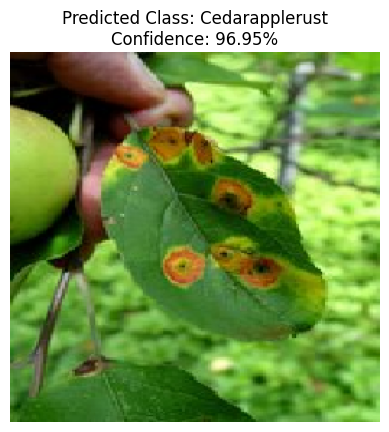

1/1 [==============================] - 0s 196ms/step
Features:
[[ 0.         0.        14.013316   0.         0.        11.439689
   0.         0.        15.010268   0.         0.         0.
   0.         0.         0.        22.803268   0.         0.
   0.         0.         0.         0.         0.         3.839834
   2.986844  20.569715   0.         0.         5.7798414  0.
   0.         0.         0.         0.         0.         4.944158
   0.         0.         0.         0.         0.         0.
   0.         0.        23.787115   1.3965591  0.         0.
   0.         0.         0.         0.         0.         4.444231
   5.240032   0.         3.7696106 17.426668  23.4345     8.745189
  14.465915  28.028696   0.         0.       ]]
Protection Measures:
1. Remove nearby cedar trees, as they serve as a host for the disease.
2. Apply fungicides to control the disease.
3. Plant apple varieties that are resistant to cedar apple rust.
4. Maintain good sanitation by removing fallen l

In [2]:


# Define a function to predict the disease and print the image with its class, reasons, features, and protection measures
def predict_disease(model, train_set, IMG_SIZE, image_path):
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image

    # Make the prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])

    # Get the class labels from train_set
    class_labels = list(train_set.class_indices.keys())

    # Define reasons and protection measures based on predicted classes
    disease_reasons = {
        'AppleBlackrot': 'Apple black rot is a fungal disease that affects apple trees. It causes black, rotting lesions on the fruit, leaves, and branches. The fungus survives in fallen leaves and mummified fruit during the winter and spreads through rain and wind. Infected fruits should be removed and destroyed to prevent further spread of the disease. Prune the affected branches during the dormant season, and apply fungicides during the growing season to protect new growth.',
        'AppleHealthy': 'No disease detected. The apple tree is healthy.',
        'AppleScab': 'Apple scab is a fungal disease that affects apple trees. It causes dark, scaly lesions on the leaves, fruit, and twigs. The fungus survives in infected fallen leaves and spreads through rain and wind. To prevent apple scab, it is important to maintain good sanitation by removing and destroying infected leaves and fruit. Fungicide sprays can also be used as a preventive measure. Choose apple cultivars that are resistant to scab.',
        'Cedarapplerust': 'Cedar apple rust is a fungal disease that affects apple trees. It causes orange or rust-colored spots on the leaves, fruit, and twigs. The disease spreads through spores that are released by cedar trees during wet weather. To prevent cedar apple rust, it is important to remove nearby cedar trees, as they serve as a host for the disease. Fungicide sprays can also be used to control the disease. Plant apple varieties that are resistant to cedar apple rust.'
    }

    protection_measures = {
        'AppleBlackrot': '1. Remove and destroy infected fruits, leaves, and branches.\n2. Prune affected branches during the dormant season.\n3. Apply fungicides during the growing season to protect new growth.\n4. Improve air circulation around the tree by pruning and thinning branches.\n5. Avoid overhead irrigation to reduce leaf wetness.',
        'AppleHealthy': 'No protection measures required.',
        'AppleScab': '1. Remove and destroy infected leaves and fruit.\n2. Maintain good sanitation by removing fallen leaves.\n3. Apply fungicides as a preventive measure.\n4. Choose apple cultivars that are resistant to scab.',
        'Cedarapplerust': '1. Remove nearby cedar trees, as they serve as a host for the disease.\n2. Apply fungicides to control the disease.\n3. Plant apple varieties that are resistant to cedar apple rust.\n4. Maintain good sanitation by removing fallen leaves and fruit.'
    }

    # Get the predicted class and confidence
    predicted_class = class_labels[predicted_class_index]
    confidence = round(100 * np.max(predictions[0]), 2)

    # Get the top 3 predicted classes and their corresponding probabilities
    top_3_indices = np.argsort(predictions[0])[::-1][:3]
    top_3_classes = [class_labels[i] for i in top_3_indices]
    top_3_probabilities = predictions[0][top_3_indices]

    # Print the prediction result
    print("Predicted Class:", predicted_class)
    print("Confidence:", confidence)
    print("Top 3 Predictions:")
    for i in range(3):
        print(f"{top_3_classes[i]}: {round(100 * top_3_probabilities[i], 2)}%")

    # Print the reasons for the predicted disease
    print("Reasons:")
    print(disease_reasons.get(predicted_class, "Reasons not available."))

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.title("Predicted Class: " + predicted_class + "\nConfidence: " + str(confidence) + "%")
    plt.show()

    # Get the features that contributed to the prediction
    intermediate_layer_model = keras.Model(inputs=model.input, outputs=model.layers[-2].output)
    features = intermediate_layer_model.predict(img_array)

    # Print the features
    print("Features:")
    print(features)

    # Print the protection measures for the predicted disease
    print("Protection Measures:")
    print(protection_measures.get(predicted_class, "Protection measures not available."))

# Usage example
model_path = 'Apple_Disease_Detection.h5'
train_dir = 'train'
IMG_SIZE = (256, 256)
image_path = './valid/Cedarapplerust/CedarAppleRust(7).jpg'

model = load_model(model_path)
train_gen = ImageDataGenerator(rescale=1./255, validation_split=0.3)
train_set = train_gen.flow_from_directory(
    train_dir,
    subset='training',
    class_mode='categorical',
    target_size=IMG_SIZE,
    batch_size=8
)

predict_disease(model, train_set, IMG_SIZE, image_path)
